Restaurant Reviews (Sentiment Analysis)
  * To build a model to predict if a review is positive or negative.
  * I have taken this dataset from kaggle and it consists of 1000 reviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset from a local drive
from google.colab import files
uploaded = files.upload()
#df = pd.read_table(r"C:\Users\AzureDevops\Downloads\Restaurant_Reviews.tsv")
#df.head()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [3]:
import io
df2 = pd.read_table(io.BytesIO(uploaded['Restaurant_Reviews.tsv']))

In [4]:
df2.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df2.shape

(1000, 2)

In [7]:
# Text Cleaning

# library to clean data 
import re
# Natural Language Tool Kit 
import nltk
nltk.download('stopwords')
# to remove the stopwords
from nltk.corpus import stopwords
# For stemming we will use portstemmer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# Create an empty list to append the clean text

corpus = []

for i in range(0, 1000):
    # remove the punctuations, numbers by iterating over the dataset,  column : 'Review', row: 'i'
    
    review = re.sub('[^a-zA-Z]', ' ', df2['Review'][i])
    
    # convert all words to lower cases 
    
    review = review.lower()
    
    # split the text into array 
    
    review = review.split()
    
    # creating portstemmer object to take main stem of each word 
    
    ps = PorterStemmer()
    
    # loop over all the text in the dataset by using list comprehension method
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    # rejoin all string array elements to create back into a string
    
    review = ' '.join(review)
    
    # Append each string to create array of the clean text.
    
    corpus.append(review)
    
print(corpus)

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

In [9]:
# merge the old and updated text.

df = pd.concat([df2, pd.DataFrame(corpus, columns=['New'])],axis = 1)

In [10]:
df.head()

,Review,Liked,New
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price


In [11]:
# Tokenization :  it helps break down a string of text into individual words that can be further processed and analyzed.
# sentence tokenization, word tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [12]:
sent_tokenize(corpus[1])

['crust good']

In [13]:
word_tokenize(corpus[1])

['crust', 'good']

In [14]:
# create a bag of words model 
# it is used to preprocess the text in to the bag of words which keeps a count of the total occurences of most frequently used words.
# here the most frequent words in sentiment analysis refers to Happy -> Positive , Angry-> Negative
# For each document in the corpus, create a vector of word counts.

from sklearn.feature_extraction.text import CountVectorizer
# create a countvectorizer object with max_features 

Cv = CountVectorizer(max_features=5)

# Load X as the Dependent variable( here corpus is the dependent variable ) and convert it into the array

X = Cv.fit_transform(corpus).toarray()

# Y as the Independent variable such as sentiment analysis ( Liked: 0 or 1)

y = df.iloc[:,1].values

In [15]:
# Split the data into the training and test data.
# import the train_test_split from scikit learn model selection
from sklearn.model_selection import train_test_split

In [30]:
# Splitting the train and test data into 70 : 30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [31]:
# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# create a object of the random forest classifier model 

model = RandomForestClassifier(n_estimators=501, criterion='entropy')

# fit the model 

model.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', n_estimators=501)

In [32]:
# Predict the model 

y_pred = model.predict(X_test)

In [33]:

# Confussion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[139  22]
 [ 83  56]]


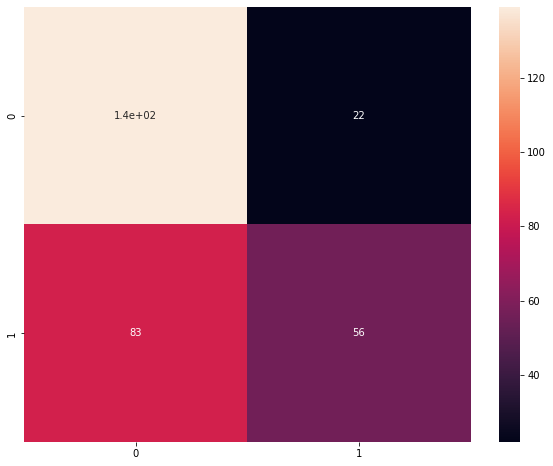

In [34]:
# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True)
plt.show()

In [35]:
# Print the classification report.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       161
           1       0.72      0.40      0.52       139

    accuracy                           0.65       300
   macro avg       0.67      0.63      0.62       300
weighted avg       0.67      0.65      0.63       300



In [36]:

# Naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)

# fit the model 

classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.1)

In [37]:
# predict the training accuracy

y_prediction_train = classifier.predict(X_train)

# create a dataframe for actual y values and the predicted y values 

y_predict_train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_prediction_train})
y_predict_train_df

,Actual,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
695,1,1
696,0,0
697,0,1
698,0,1


In [38]:
 #printing the training accuracy

from sklearn.metrics import accuracy_score

print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_prediction_train),3)}')


Training-set accuracy score: 0.539


In [39]:
# printing the testing accuracy

y_prediction_test = classifier.predict(X_test)

# create a dataframe for actual y values and the predicted y values 

y_predict_train_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction_test})
y_predict_train_df

,Actual,Predicted
0,0,1
1,0,1
2,0,0
3,1,1
4,0,1
...,...,...
295,1,0
296,0,1
297,1,0
298,1,1


In [40]:
 #printing the testing accuracy

from sklearn.metrics import accuracy_score

print(f'Testing-set accuracy score: {round(accuracy_score(y_test, y_prediction_test),3)}')

Testing-set accuracy score: 0.537


In [41]:
# Support vector machines 
from sklearn.svm import SVC

# instantiate the model.
model = SVC(random_state=2020, C=1.7)

# fit the model
model.fit(X_train, y_train)



SVC(C=1.7, random_state=2020)

In [44]:
# predict the testing accuracy

y_pre_test = model.predict(X_test)

# create a dataframe for actual y_test and predicted y_test 

y_test_df = pd.DataFrame({'Actual':y_test,'Predicted_test':y_pre_test})

y_test_df

,Actual,Predicted_test
0,0,0
1,0,0
2,0,1
3,1,1
4,0,0
...,...,...
295,1,1
296,0,0
297,1,1
298,1,0


In [43]:
# predict the training accuracy

y_pre_train = model.predict(X_train)

# create a dataframe for  actual y_train and predicted y_train values

y_train_df = pd.DataFrame({'Actual':y_train,'Predicted_train':y_pre_train})

y_train_df

,Actual,Predicted_train
0,0,0
1,1,0
2,1,1
3,1,0
4,1,1
...,...,...
695,1,0
696,0,0
697,0,0
698,0,0


In [45]:
# printing the training & testing accuracy.

print(f'Training accuracy score :{round(accuracy_score(y_train, y_pre_train),3)}')

print(f'Testing accuracy score:{round(accuracy_score(y_test, y_pre_test),3)}')

Training accuracy score :0.589
Testing accuracy score:0.647
